In [1]:
#Import libraries
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import norm
from scipy import stats
import scipy as sp
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
warnings.filterwarnings("ignore")
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 300)

## Read and explore data 

In [2]:
#read in housedata data
df = pd.read_csv('kc_house_data_train.csv', index_col=0)


In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


df.shape

In [4]:
df['yr_renovated'].describe()

count    17290.000000
mean        83.806304
std        400.329376
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [6]:
df['date']

0        20141006T000000
1        20140821T000000
2        20140815T000000
3        20150331T000000
4        20140714T000000
              ...       
17285    20150303T000000
17286    20140520T000000
17287    20140514T000000
17288    20141204T000000
17289    20150116T000000
Name: date, Length: 17290, dtype: object

Convert date to yyyy-mm-dd

In [7]:
df['date'] = df['date'].str[:8]

In [8]:
df["date"]= pd.to_datetime(df["date"]) 

In [9]:
df['date']

0       2014-10-06
1       2014-08-21
2       2014-08-15
3       2015-03-31
4       2014-07-14
           ...    
17285   2015-03-03
17286   2014-05-20
17287   2014-05-14
17288   2014-12-04
17289   2015-01-16
Name: date, Length: 17290, dtype: datetime64[ns]

In [10]:
#Data is all present
df.isna().head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Explore price as outcome variable. I decided to trim some of the extreme outlier points, anywhere price was in the 99th %tile

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1ab7b6d0>]],
      dtype=object)

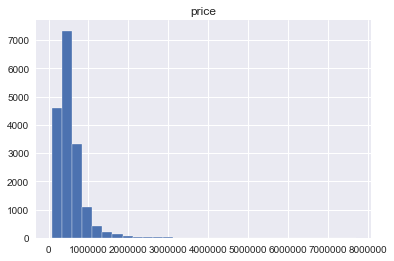

In [11]:
df.hist(column=['price'], bins=30)

In [12]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [13]:
print(df.price.quantile(.925))
print(df.price.quantile(.95))
print(df.price.quantile(.975))
print(df.price.quantile(.99))

973303.7500000012
1150000.0
1484977.4999999998
1990880.0000000047


## Dropping some columns

Here is my initial column drop, I decided to drop latitude, longitude, and the sqft of closest 15 neighbors. All four of these should be encompassed within zipcode as a variable so I felt comfortable dropping these right away.

In [14]:
df2 = df.copy()
df2_tgt = df.price

In [15]:
df.drop(columns=['lat', 'long','sqft_living15','sqft_lot15'], inplace=True)

In [16]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052


In [17]:
df = df[df['price'] < 1990880] 

In [18]:
#sns.pairplot(df, diag_kind="kde", height=5)
#commenting this out since it takes a long time to run

In [19]:
#turning year renovated into a dummy
df['yr_renovated'] = np.where(df['yr_renovated']>0, 1, 0)
df['yr_renovated']

0        0
1        0
2        0
3        0
4        0
        ..
17285    0
17286    0
17287    0
17288    0
17289    0
Name: yr_renovated, Length: 17117, dtype: int64

In [20]:
df['logsqft_above'] = np.log(df['sqft_above'])
df['logsqft_living'] = np.log(df['sqft_living'])
df['logsqft_lot'] = np.log(df['sqft_lot'])


## Creating Target and Feature DataFrames 

In [21]:
df_tgt = df.price
df_feat = df.drop(['price','id'], axis=1)
df_feat.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,logsqft_above,logsqft_living,logsqft_lot
0,2014-10-06,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,7.635304,7.635304,9.093020
1,2014-08-21,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,7.512071,7.972466,8.814330
2,2014-08-15,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,8.234830,8.234830,9.295876
3,2015-03-31,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,8.425078,8.425078,9.589325
4,2014-07-14,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,7.843849,7.843849,8.589700


In [22]:
df_tgt.shape

(17117,)

In [23]:
df_feat.shape

(17117, 18)

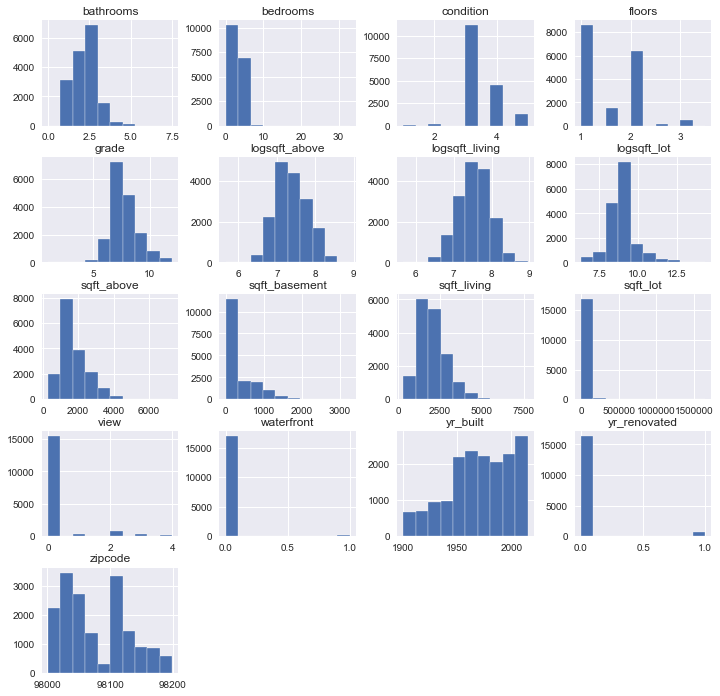

In [24]:
df_feat.hist(figsize  = [12, 12]); 

add some log columns

In [25]:
df_feat

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,logsqft_above,logsqft_living,logsqft_lot
0,2014-10-06,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,7.635304,7.635304,9.093020
1,2014-08-21,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,7.512071,7.972466,8.814330
2,2014-08-15,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,8.234830,8.234830,9.295876
3,2015-03-31,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,8.425078,8.425078,9.589325
4,2014-07-14,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,7.843849,7.843849,8.589700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,2015-03-03,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,7.610853,8.083329,9.206332
17286,2014-05-20,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,7.170120,7.170120,8.294050
17287,2014-05-14,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,6.956545,6.956545,9.197863
17288,2014-12-04,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,7.170120,7.549609,10.673272


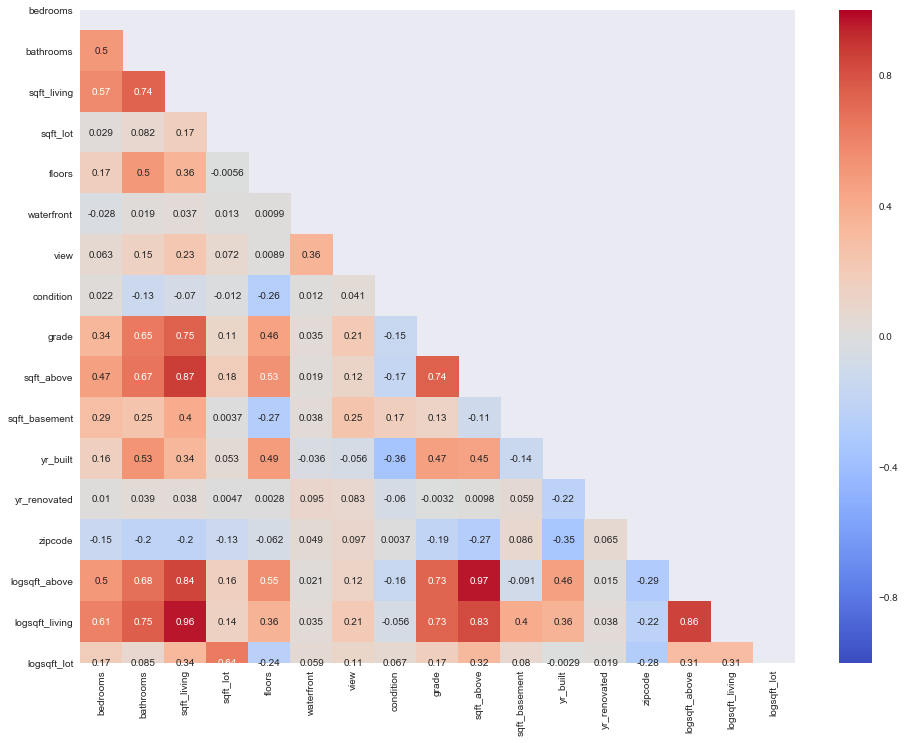

In [26]:
f, ax = plt.subplots(figsize=(16, 12))
matrix = np.triu(df_feat.corr())
sns.heatmap(df_feat.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)




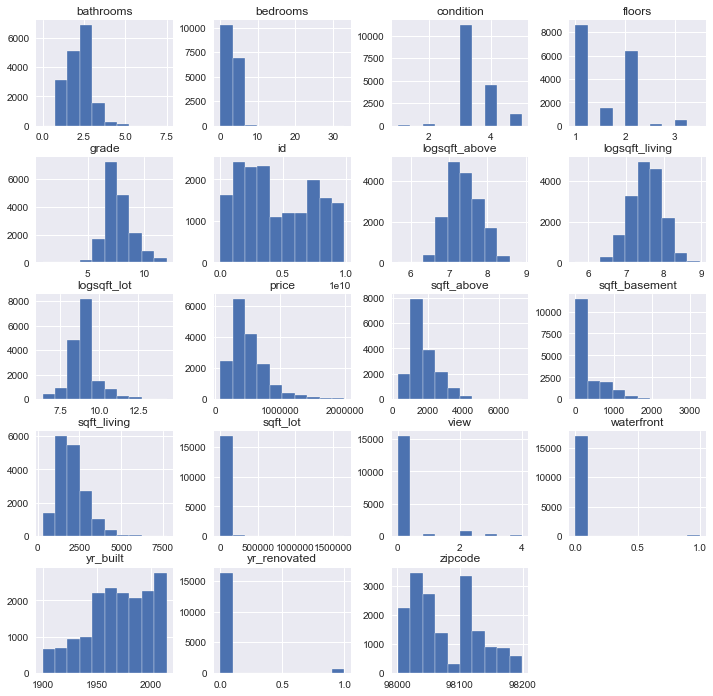

In [27]:

warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (12,12))
ax = fig.gca()
df.hist(ax = ax);

## Regressions

## Base Model- All features minus date

In [28]:
df_feat_base = df_feat.drop(['date','logsqft_living','logsqft_lot','logsqft_above'], axis=1)

In [29]:
df_feat_base.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058
1,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115
2,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006
3,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034
4,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052


## Create the train/test sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_feat_base, df_tgt, random_state=13,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13693, 14) Target:  (13693,)
Training set - Features:  (3424, 14) Target:  (3424,)


In [31]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
reg.coef_


array([-1.86176278e+04,  2.91449227e+04,  7.86946316e+01, -5.83274974e-02,
        3.96060626e+04,  2.24955869e+05,  3.97277433e+04,  2.12897501e+04,
        1.23119596e+05,  3.09610725e+01,  4.77335590e+01, -2.99713132e+03,
        2.46794131e+04,  1.81511292e+01])

In [33]:
reg.intercept_

3335314.0612345506

In [34]:
df_feat_base_col = pd.DataFrame(data = df_feat_base.columns.values, columns=['Features'])
df_feat_base_col

,Features
0,bedrooms
1,bathrooms
2,sqft_living
3,sqft_lot
4,floors
5,waterfront
6,view
7,condition
8,grade
9,sqft_above


In [35]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([1.34230682e-304, 0.00000000e+000, 0.00000000e+000, 1.30303707e-028,
       2.15399918e-234, 1.62725114e-068, 0.00000000e+000, 3.36026444e-006,
       0.00000000e+000, 0.00000000e+000, 8.68624003e-263, 1.98809061e-014,
       1.14293871e-041, 1.67884843e-007])

In [36]:
df_feat_base_col['Weights'] = reg.coef_
df_feat_base_col['P Values'] = p_values.round(3)
df_feat_base_col.sort_values(['Weights'], ascending=False)

,Features,Weights,P Values
5,waterfront,224955.869157,0.0
8,grade,123119.596301,0.0
6,view,39727.743277,0.0
4,floors,39606.062572,0.0
1,bathrooms,29144.922699,0.0
12,yr_renovated,24679.413130,0.0
7,condition,21289.750149,0.0
2,sqft_living,78.694632,0.0
10,sqft_basement,47.733559,0.0
9,sqft_above,30.961073,0.0


r^2 values

In [37]:
r2_train = reg.score(X_train, y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)

Error values

In [38]:
y_train_pred = reg.predict(X_train)
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)





Mean Absolute Error: 121524.74874932754
Mean Squared Error: 28593936649.58728
Root Mean Squared Error: 169097.4176313384


In [39]:
price_std = df_tgt.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.427381486409672
Root Mean Squared Error: 0.5946863205978724


In [40]:
reg.score(X_test, y_test)


0.63179656041394

In [41]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.6302844312985968

In [42]:
y_test_pred = reg.predict(X_test)
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 127397.95456267911
Mean Squared Error: 32395657006.51421
Root Mean Squared Error: 179987.93572490965


In [43]:

print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.44803653368467417
Root Mean Squared Error Z: 0.6329863858808928


Text(0, 0.5, 'Predictions')

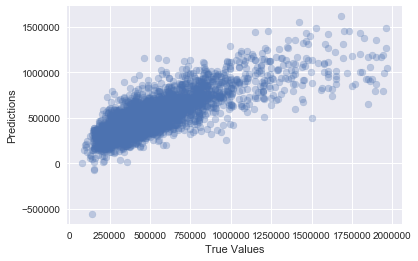

In [44]:

plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [45]:

train_rmse = round(train_rmse, 3)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)

r2_test

0.632

In [46]:
summary_df = pd.DataFrame(columns=['Model', 'Description','Root Mean Squared Error (RMSE)', 'R-squared (training)', 'Adjusted R-squared (training)','R-squared (test)', 'Adjusted R-squared (test)', '5-fold Cross Validation'])
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation


In [47]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-1', 'Description' : 'Cary- Base' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,Cary- Base,169097.418,0.638,0.638,0.632,0.63,NaN


## Model with bedrooms, bathrooms, sqft_living, waterfront, view, condition

In [48]:
df_feat_two = df_feat[['bedrooms','bathrooms','sqft_living','sqft_lot','waterfront','view','condition']]



In [49]:
X_train, X_test, y_train, y_test = train_test_split(df_feat_two, df_tgt, random_state=13,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13693, 7) Target:  (13693,)
Training set - Features:  (3424, 7) Target:  (3424,)


In [50]:
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.coef_
reg.intercept_
df_feat_two_col = pd.DataFrame(data = df_feat_two.columns.values, columns=['Features'])
df_feat_two_col


,Features
0,bedrooms
1,bathrooms
2,sqft_living
3,sqft_lot
4,waterfront
5,view
6,condition


In [51]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([1.34230682e-304, 0.00000000e+000, 0.00000000e+000, 1.30303707e-028,
       1.62725114e-068, 0.00000000e+000, 3.36026444e-006])

In [52]:
df_feat_two_col['Weights'] = reg.coef_
df_feat_two_col['P Values'] = p_values.round(3)
df_feat_two_col.sort_values(['Weights'], ascending=False)

,Features,Weights,P Values
4,waterfront,227723.823284,0.0
5,view,61472.492966,0.0
6,condition,38215.969341,0.0
1,bathrooms,14807.097241,0.0
2,sqft_living,222.590321,0.0
3,sqft_lot,-0.217095,0.0
0,bedrooms,-31702.397026,0.0


In [53]:
r2_train = reg.score(X_train, y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)

In [54]:
y_train_pred = reg.predict(X_train)
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)





Mean Absolute Error: 144531.25836312026
Mean Squared Error: 38514167157.1379
Root Mean Squared Error: 196250.26664220841


In [55]:
price_std = df_tgt.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.5082913946961152
Root Mean Squared Error: 0.6901781861639572


In [56]:
reg.score(X_test, y_test)


0.5151928175180456

In [57]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.514199360176894

In [58]:
y_test_pred = reg.predict(X_test)
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 150045.4032239731
Mean Squared Error: 42654808482.06217
Root Mean Squared Error: 206530.40570836578


In [59]:

print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.5276836868107909
Root Mean Squared Error Z: 0.7263316541596422


Text(0, 0.5, 'Predictions')

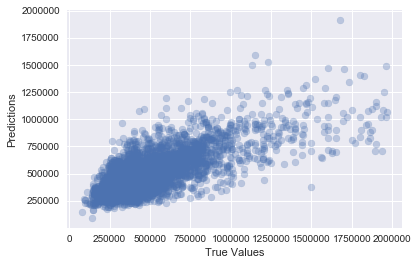

In [60]:

plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [61]:

train_rmse = round(train_rmse, 3)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)

r2_test

0.515

In [62]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-2', 'Description' : 'Cary- Two' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,Cary- Base,169097.418,0.638,0.638,0.632,0.630,NaN
1,Multiple Regression-2,Cary- Two,196250.267,0.513,0.512,0.515,0.514,NaN


## Model 3-  model 2 scaled

In [63]:
scaler = StandardScaler()
scaler.fit(df_feat_two)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [64]:
df_feat_two_sc = scaler.transform(df_feat_two)
df_feat_two_sc


array([[ 0.68241456,  0.20860197,  0.02160934, ..., -0.07510054,
        -0.29824876,  0.9114778 ],
       [ 1.75346628,  1.21413277,  0.98802578, ..., -0.07510054,
        -0.29824876,  2.44965837],
       [ 0.68241456,  0.5437789 ,  2.00101649, ..., -0.07510054,
         2.41941105, -0.62670277],
       ...,
       [-0.38863716, -1.46728271, -1.16603494, ..., -0.07510054,
        -0.29824876, -0.62670277],
       [-0.38863716, -0.79692884, -0.17633137, ..., -0.07510054,
        -0.29824876,  0.9114778 ],
       [-0.38863716, -0.79692884, -0.84001494, ..., -0.07510054,
        -0.29824876,  0.9114778 ]])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(df_feat_two_sc, df_tgt, random_state=13,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13693, 7) Target:  (13693,)
Training set - Features:  (3424, 7) Target:  (3424,)


In [66]:
X_train

array([[ 0.68241456,  0.87895584,  1.33733292, ..., -0.07510054,
        -0.29824876, -0.62670277],
       [-0.38863716, -0.4617519 , -0.7352228 , ..., -0.07510054,
        -0.29824876, -0.62670277],
       [-1.45968887, -1.46728271, -1.52698566, ..., -0.07510054,
        -0.29824876,  0.9114778 ],
       ...,
       [-0.38863716,  0.20860197, -0.29276708, ..., -0.07510054,
        -0.29824876,  0.9114778 ],
       [-0.38863716,  0.5437789 , -0.37427208, ..., -0.07510054,
        -0.29824876, -0.62670277],
       [-0.38863716, -0.4617519 , -0.39755923, ..., -0.07510054,
        -0.29824876,  0.9114778 ]])

In [67]:
reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)
df_feat_two_sc_col = pd.DataFrame(data = df_feat_two.columns.values, columns=['Features'])
df_feat_two_sc_col


[-29599.31489051  11044.23937989 191170.14252523  -9057.89884021
  17006.26602402  45239.28474866  24844.91748291]
516244.494388587


,Features
0,bedrooms
1,bathrooms
2,sqft_living
3,sqft_lot
4,waterfront
5,view
6,condition


In [68]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([1.34230682e-304, 0.00000000e+000, 0.00000000e+000, 1.30303707e-028,
       1.62725114e-068, 0.00000000e+000, 3.36026444e-006])

In [69]:
df_feat_two_sc_col['Weights'] = reg.coef_
df_feat_two_sc_col['P Values'] = p_values.round(3)
df_feat_two_sc_col.sort_values(['Weights'], ascending=False)

,Features,Weights,P Values
2,sqft_living,191170.142525,0.0
5,view,45239.284749,0.0
6,condition,24844.917483,0.0
4,waterfront,17006.266024,0.0
1,bathrooms,11044.239380,0.0
3,sqft_lot,-9057.898840,0.0
0,bedrooms,-29599.314891,0.0


In [70]:
r2_train = reg.score(X_train, y_train)
r2_train

0.5126705407340736

In [71]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.512421267353375

In [72]:
y_train_pred = reg.predict(X_train)
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 144531.25836311965
Mean Squared Error: 38514167157.1379
Root Mean Squared Error: 196250.26664220841


In [73]:
price_std = df_tgt.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.5082913946961131
Root Mean Squared Error: 0.6901781861639572


In [74]:
reg.score(X_test, y_test)

0.5151928175180355

In [75]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.514199360176884

In [76]:
y_test_pred = reg.predict(X_test)
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 150045.4032239735
Mean Squared Error: 42654808482.063065
Root Mean Squared Error: 206530.40570836794


In [77]:

print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.5276836868107924
Root Mean Squared Error Z: 0.7263316541596497


Text(0, 0.5, 'Predictions')

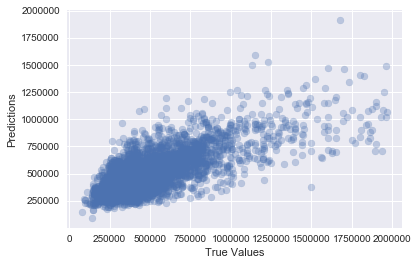

In [78]:

plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [79]:

train_rmse = round(train_rmse, 3)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)

r2_test

0.515

In [80]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-3', 'Description' : 'Cary- Base Scaled' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,Cary- Base,169097.418,0.638,0.638,0.632,0.630,NaN
1,Multiple Regression-2,Cary- Two,196250.267,0.513,0.512,0.515,0.514,NaN
2,Multiple Regression-3,Cary- Base Scaled,196250.267,0.513,0.512,0.515,0.514,NaN


## Model 4- No sqft lot
It doesnt make intuitive sense that lot size would have a negative slope so removing that feature. Bedrooms also has a negative slope which doesnt seem correct so will look at that after this one

In [81]:
df_feat_four = df_feat[['bedrooms','bathrooms','sqft_living','waterfront','view','condition','zipcode','yr_built']]


In [82]:
X_train, X_test, y_train, y_test = train_test_split(df_feat_four, df_tgt, random_state=13,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13693, 8) Target:  (13693,)
Training set - Features:  (3424, 8) Target:  (3424,)


In [83]:
reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)
df_feat_four_col = pd.DataFrame(data = df_feat_four.columns.values, columns=['Features'])
df_feat_four_col

[-3.67393762e+04  5.92938699e+04  2.20351851e+02  2.26275981e+05
  5.07954587e+04  1.43860283e+04  1.21047632e+02 -1.92602391e+03]
-8074328.765323863


,Features
0,bedrooms
1,bathrooms
2,sqft_living
3,waterfront
4,view
5,condition
6,zipcode
7,yr_built


In [84]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([1.34230682e-304, 0.00000000e+000, 0.00000000e+000, 1.62725114e-068,
       0.00000000e+000, 3.36026444e-006, 1.67884843e-007, 1.98809061e-014])

In [85]:
df_feat_four_col['Weights'] = reg.coef_
df_feat_four_col['P Values'] = p_values.round(3)
df_feat_four_col.sort_values(['Weights'], ascending=False)

,Features,Weights,P Values
3,waterfront,226275.980874,0.0
1,bathrooms,59293.869922,0.0
4,view,50795.458684,0.0
5,condition,14386.028281,0.0
2,sqft_living,220.351851,0.0
6,zipcode,121.047632,0.0
7,yr_built,-1926.023915,0.0
0,bedrooms,-36739.376209,0.0


In [86]:
r2_train = reg.score(X_train, y_train)
r2_train

0.5390314326281469

In [87]:
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.538761939165784

In [88]:
y_train_pred = reg.predict(X_train)
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 139814.38718880544
Mean Squared Error: 36430837743.09242
Root Mean Squared Error: 190868.64002002115


In [89]:
price_std = df_tgt.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.4917029760042168
Root Mean Squared Error: 0.6712519377350339


In [90]:
reg.score(X_test, y_test)

0.5420034180179695

In [91]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.5409305124086412

In [92]:
y_test_pred = reg.predict(X_test)
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 145849.86984076552
Mean Squared Error: 40295930414.7887
Root Mean Squared Error: 200738.46271900335


In [93]:

print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.5129287228051026
Root Mean Squared Error Z: 0.7059623941573047


## Base with sqft in log

In [94]:
df_feat_base_log = df_feat.drop(['date','sqft_living','sqft_lot','sqft_above'], axis=1)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(df_feat_base_log, df_tgt, random_state=13,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13693, 14) Target:  (13693,)
Training set - Features:  (3424, 14) Target:  (3424,)


In [96]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
reg.coef_

array([-1.55080993e+04,  3.97161012e+04,  2.52045908e+04,  2.34438142e+05,
        3.92442536e+04,  1.89582668e+04,  1.36233904e+05,  1.57120483e+02,
       -3.13227323e+03,  2.21325336e+04, -2.03899457e+01,  2.64558589e+05,
       -1.08849223e+05, -1.43248788e+04])

In [98]:
reg.intercept_

6458213.0439346405

In [99]:
df_feat_base_log_col = pd.DataFrame(data = df_feat_base_log.columns.values, columns=['Features'])
df_feat_base_log_col

,Features
0,bedrooms
1,bathrooms
2,floors
3,waterfront
4,view
5,condition
6,grade
7,sqft_basement
8,yr_built
9,yr_renovated


In [100]:
p_values = f_regression(X_train,y_train)[1]
p_values

array([1.34230682e-304, 0.00000000e+000, 2.15399918e-234, 1.62725114e-068,
       0.00000000e+000, 3.36026444e-006, 0.00000000e+000, 8.68624003e-263,
       1.98809061e-014, 1.14293871e-041, 1.67884843e-007, 0.00000000e+000,
       0.00000000e+000, 8.26958288e-068])

In [101]:
df_feat_base_log_col['Weights'] = reg.coef_
df_feat_base_log_col['P Values'] = p_values.round(3)
df_feat_base_log_col.sort_values(['Weights'], ascending=False)

,Features,Weights,P Values
11,logsqft_above,264558.588844,0.0
3,waterfront,234438.141916,0.0
6,grade,136233.903678,0.0
1,bathrooms,39716.101155,0.0
4,view,39244.253639,0.0
2,floors,25204.590754,0.0
9,yr_renovated,22132.533626,0.0
5,condition,18958.266836,0.0
7,sqft_basement,157.120483,0.0
10,zipcode,-20.389946,0.0


In [102]:
r2_train = reg.score(X_train, y_train)
r2_train
n = X_train.shape[0]
p = X_train.shape[1]

adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train

0.6276562674269828

In [103]:
y_train_pred = reg.predict(X_train)
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 123459.6069422734
Mean Squared Error: 29396633810.977425
Root Mean Squared Error: 171454.465707305


In [104]:
price_std = df_tgt.std()

print('Mean Absolute Error:', train_mae/price_std )
print('Root Mean Squared Error:' , train_rmse/price_std)

Mean Absolute Error: 0.43418604744767797
Root Mean Squared Error: 0.6029756503073587


In [105]:
reg.score(X_test, y_test)

0.6183305354663649

In [106]:
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_test

0.6167631044005183

In [107]:
y_test_pred = reg.predict(X_test)
test_mae = metrics.mean_absolute_error(y_test, y_test_pred)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:', test_mae )
print('Mean Squared Error:',  test_mse)
print('Root Mean Squared Error:' , test_rmse)

Mean Absolute Error: 129638.53186296944
Mean Squared Error: 33580438783.493904
Root Mean Squared Error: 183249.66243759877


In [108]:

print('Mean Absolute Error  Z:', test_mae/price_std )
print('Root Mean Squared Error Z:' , test_rmse/price_std)

Mean Absolute Error  Z: 0.45591625585541556
Root Mean Squared Error Z: 0.6444573136143593


Text(0, 0.5, 'Predictions')

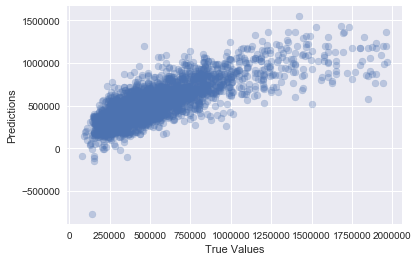

In [109]:

plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [110]:
train_rmse = round(train_rmse, 3)
r2_train = round(r2_train, 3)
adjusted_r2_train = round(adjusted_r2_train, 3)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)

r2_test

0.618

In [111]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-4', 'Description' : 'Cary- Base Log' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,Cary- Base,169097.418,0.638,0.638,0.632,0.630,NaN
1,Multiple Regression-2,Cary- Two,196250.267,0.513,0.512,0.515,0.514,NaN
2,Multiple Regression-3,Cary- Base Scaled,196250.267,0.513,0.512,0.515,0.514,NaN
3,Multiple Regression-4,Cary- Base Log,171454.466,0.628,0.628,0.618,0.617,NaN


## Polynomial 2nd order

In [112]:
X_train, X_test, y_train, y_test = train_test_split(df_feat_base, df_tgt, random_state=13,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13693, 14) Target:  (13693,)
Training set - Features:  (3424, 14) Target:  (3424,)


In [113]:
poly = PolynomialFeatures(2)
X_train_fin = poly.fit_transform(X_train)
X_test_fin = poly.fit_transform(X_test)

In [114]:
reg_poly = LinearRegression()
reg_poly.fit(X_train_fin,y_train)
predict = reg_poly.predict(X_test_fin)

In [115]:
train_rmse = np.sqrt(mean_squared_error(y_train, reg_poly.predict(X_train_fin)))

In [116]:
r2_train = reg_poly.score(X_train_fin, y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
print(r2_train)
print(adjusted_r2_train)

0.6781761592677358
0.6778467592260446


In [117]:
r2_test = reg_poly.score(X_test_fin, y_test)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
print(r2_test)
print(adjusted_r2_test)

0.6582063384765202
0.6568026684086621


In [118]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-5', 'Description' : 'Cary- Base Poly2' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,Cary- Base,169097.418000,0.638000,0.638000,0.632000,0.630000,NaN
1,Multiple Regression-2,Cary- Two,196250.267000,0.513000,0.512000,0.515000,0.514000,NaN
2,Multiple Regression-3,Cary- Base Scaled,196250.267000,0.513000,0.512000,0.515000,0.514000,NaN
3,Multiple Regression-4,Cary- Base Log,171454.466000,0.628000,0.628000,0.618000,0.617000,NaN
4,Multiple Regression-5,Cary- Base Poly2,159480.661919,0.678176,0.677847,0.658206,0.656803,NaN


## 3rd order polynomial

In [119]:
poly = PolynomialFeatures(3)
X_train_fin = poly.fit_transform(X_train)
X_test_fin = poly.fit_transform(X_test)

In [120]:
reg_poly = LinearRegression()
reg_poly.fit(X_train_fin,y_train)
predict = reg_poly.predict(X_test_fin)

In [121]:
train_rmse = np.sqrt(mean_squared_error(y_train, reg_poly.predict(X_train_fin)))

In [122]:
r2_train = reg_poly.score(X_train_fin, y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
print(r2_train)
print(adjusted_r2_train)

0.7038559226623606
0.7035528069230181


In [123]:
r2_test = reg_poly.score(X_test_fin, y_test)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
print(r2_test)
print(adjusted_r2_test)

0.601803873647338
0.6001685712803866


In [124]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-6', 'Description' : 'Cary- Base Poly3' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,Cary- Base,169097.418000,0.638000,0.638000,0.632000,0.630000,NaN
1,Multiple Regression-2,Cary- Two,196250.267000,0.513000,0.512000,0.515000,0.514000,NaN
2,Multiple Regression-3,Cary- Base Scaled,196250.267000,0.513000,0.512000,0.515000,0.514000,NaN
3,Multiple Regression-4,Cary- Base Log,171454.466000,0.628000,0.628000,0.618000,0.617000,NaN
4,Multiple Regression-5,Cary- Base Poly2,159480.661919,0.678176,0.677847,0.658206,0.656803,NaN
5,Multiple Regression-6,Cary- Base Poly3,152985.562797,0.703856,0.703553,0.601804,0.600169,NaN


In [125]:
df2['year']=df2['date'].apply(lambda x: x.year)
df2 = df2.drop(['id','date'], axis=1)

## 2nd order polynomial all columns

In [126]:

df_feat_poly = df2.drop(['price'], axis=1)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(df_feat_poly, df2_tgt, random_state=13,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 19) Target:  (13832,)
Training set - Features:  (3458, 19) Target:  (3458,)


In [128]:
poly = PolynomialFeatures(2)
X_train_fin = poly.fit_transform(X_train)
X_test_fin = poly.fit_transform(X_test)

In [129]:
reg_poly = LinearRegression()
reg_poly.fit(X_train_fin,y_train)
predict = reg_poly.predict(X_test_fin)

In [130]:
train_rmse = np.sqrt(mean_squared_error(y_train, reg_poly.predict(X_train_fin)))

In [131]:
r2_train = reg_poly.score(X_train_fin, y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
print(r2_train)
print(adjusted_r2_train)

0.8337640874920405
0.8335354108096157


In [132]:
r2_test = reg_poly.score(X_test_fin, y_test)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
print(r2_test)
print(adjusted_r2_test)

0.8233893704331472
0.8224133372854537


In [133]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-7', 'Description' : 'Cary- Base PolyAll' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,Cary- Base,169097.418000,0.638000,0.638000,0.632000,0.630000,NaN
1,Multiple Regression-2,Cary- Two,196250.267000,0.513000,0.512000,0.515000,0.514000,NaN
2,Multiple Regression-3,Cary- Base Scaled,196250.267000,0.513000,0.512000,0.515000,0.514000,NaN
3,Multiple Regression-4,Cary- Base Log,171454.466000,0.628000,0.628000,0.618000,0.617000,NaN
4,Multiple Regression-5,Cary- Base Poly2,159480.661919,0.678176,0.677847,0.658206,0.656803,NaN
5,Multiple Regression-6,Cary- Base Poly3,152985.562797,0.703856,0.703553,0.601804,0.600169,NaN
6,Multiple Regression-7,Cary- Base PolyAll,150665.511104,0.833764,0.833535,0.823389,0.822413,NaN


## Dropping sqft_above

In [134]:

df_feat_poly2 = df2.drop(['price','sqft_above'], axis=1)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(df_feat_poly2, df2_tgt, random_state=13,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (13832, 18) Target:  (13832,)
Training set - Features:  (3458, 18) Target:  (3458,)


In [136]:
poly = PolynomialFeatures(2)
X_train_fin = poly.fit_transform(X_train)
X_test_fin = poly.fit_transform(X_test)

In [137]:
reg_poly = LinearRegression()
reg_poly.fit(X_train_fin,y_train)
predict = reg_poly.predict(X_test_fin)

In [138]:
train_rmse = np.sqrt(mean_squared_error(y_train, reg_poly.predict(X_train_fin)))

In [139]:
r2_train = reg_poly.score(X_train_fin, y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
print(r2_train)
print(adjusted_r2_train)

0.8331388517919027
0.8329214116508945


In [140]:
r2_test = reg_poly.score(X_test_fin, y_test)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
print(r2_test)
print(adjusted_r2_test)

0.8270223508668372
0.8261169720693969


In [141]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-8', 'Description' : 'Cary- Poly No Sqft Above' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,Cary- Base,169097.418000,0.638000,0.638000,0.632000,0.630000,NaN
1,Multiple Regression-2,Cary- Two,196250.267000,0.513000,0.512000,0.515000,0.514000,NaN
2,Multiple Regression-3,Cary- Base Scaled,196250.267000,0.513000,0.512000,0.515000,0.514000,NaN
3,Multiple Regression-4,Cary- Base Log,171454.466000,0.628000,0.628000,0.618000,0.617000,NaN
4,Multiple Regression-5,Cary- Base Poly2,159480.661919,0.678176,0.677847,0.658206,0.656803,NaN
5,Multiple Regression-6,Cary- Base Poly3,152985.562797,0.703856,0.703553,0.601804,0.600169,NaN
6,Multiple Regression-7,Cary- Base PolyAll,150665.511104,0.833764,0.833535,0.823389,0.822413,NaN
7,Multiple Regression-8,Cary- Poly No Sqft Above,150948.581847,0.833139,0.832921,0.827022,0.826117,NaN


In [142]:
df_feat_poly2.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year'],
      dtype='object')

## dropping columns

In [154]:
df_feat_polyTEST = df2.copy()


a_up = df_feat_polyTEST.price.quantile(.975)
a_low = df_feat_polyTEST.price.quantile(.025)
b_up = df_feat_polyTEST.sqft_living.quantile(.975)
b_low = df_feat_polyTEST.sqft_living.quantile(.025) 
c_up = df_feat_polyTEST.sqft_lot.quantile(.975)
c_low = df_feat_polyTEST.sqft_lot.quantile(.025)
df_feat_polyTEST = df_feat_polyTEST[df_feat_polyTEST['price']<a_up]
df_feat_polyTEST = df_feat_polyTEST[df_feat_polyTEST['price']>a_low]
df_feat_polyTEST = df_feat_polyTEST[df_feat_polyTEST['sqft_lot']<c_up]
df_feat_polyTEST = df_feat_polyTEST[df_feat_polyTEST['price']>c_low]
df_feat_polyTEST = df_feat_polyTEST[df_feat_polyTEST['sqft_living']<b_up]
df_feat_polyTEST = df_feat_polyTEST[df_feat_polyTEST['price']>b_low]

df_tgt_polyTEST = df_feat_polyTEST.price
df_feat_polyTEST = df_feat_polyTEST.drop(['price','sqft_above'], axis=1)


In [155]:
X_train, X_test, y_train, y_test = train_test_split(df_feat_polyTEST, df_tgt_polyTEST, random_state=13,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (12638, 18) Target:  (12638,)
Training set - Features:  (3160, 18) Target:  (3160,)


In [156]:
poly = PolynomialFeatures(2)
X_train_fin = poly.fit_transform(X_train)
X_test_fin = poly.fit_transform(X_test)

In [157]:
reg_poly = LinearRegression()
reg_poly.fit(X_train_fin,y_train)
predict = reg_poly.predict(X_test_fin)

In [158]:
train_rmse = np.sqrt(mean_squared_error(y_train, reg_poly.predict(X_train_fin)))

In [159]:
r2_train = reg_poly.score(X_train_fin, y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
print(r2_train)
print(adjusted_r2_train)

0.7799051430862014
0.7795911952754043


In [160]:
r2_test = reg_poly.score(X_test_fin, y_test)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
print(r2_test)
print(adjusted_r2_test)

0.7588487337862576
0.7574667781059496


In [161]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-9', 'Description' : 'Cary- Poly Test' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df



,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-fold Cross Validation
0,Multiple Regression-1,Cary- Base,169097.418000,0.638000,0.638000,0.632000,0.630000,NaN
1,Multiple Regression-2,Cary- Two,196250.267000,0.513000,0.512000,0.515000,0.514000,NaN
2,Multiple Regression-3,Cary- Base Scaled,196250.267000,0.513000,0.512000,0.515000,0.514000,NaN
3,Multiple Regression-4,Cary- Base Log,171454.466000,0.628000,0.628000,0.618000,0.617000,NaN
4,Multiple Regression-5,Cary- Base Poly2,159480.661919,0.678176,0.677847,0.658206,0.656803,NaN
5,Multiple Regression-6,Cary- Base Poly3,152985.562797,0.703856,0.703553,0.601804,0.600169,NaN
6,Multiple Regression-7,Cary- Base PolyAll,150665.511104,0.833764,0.833535,0.823389,0.822413,NaN
7,Multiple Regression-8,Cary- Poly No Sqft Above,150948.581847,0.833139,0.832921,0.827022,0.826117,NaN
8,Multiple Regression-9,Cary- Poly Test,108562.893357,0.779905,0.779591,0.758849,0.757467,NaN


In [162]:
df2['sqft_living'].quantile(.995)

5605.550000000003